In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Exploratory data analysis

In [56]:
df = pd.read_csv('cover_data.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [57]:
cols = df.columns.tolist()
features, label = cols[:-1], cols[-1]
print(cols)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'class']


Data preparation

In [58]:
raw_data = df.values

X = raw_data[:, :-1]
y = raw_data[:, -1]

#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

#Normalize data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [59]:
X_train = X_train_normalized
X_test = X_test_normalized

In [60]:
def plot_history(history, param):
    #Accuracy and loss performance over several epochs
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

Build model

In [61]:
num_features = len(features)

classifier = keras.Sequential()
classifier.add(layers.Dense(64, input_dim=num_features, activation='relu'))
classifier.add(layers.Dense(32, activation='relu'))
classifier.add(layers.Dense(8, activation='softmax'))
classifier.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [62]:
print("Summary report of Keras classifier:")
classifier.summary()

Summary report of Keras classifier:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                3520      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 8)                 264       
                                                                 
Total params: 5,864
Trainable params: 5,864
Non-trainable params: 0
_________________________________________________________________


Train model

Epoch 1/100
409/409 [==============================] - 5s 10ms/step - loss: 0.8134 - accuracy: 0.6746 - val_loss: 0.6129 - val_accuracy: 0.7425
Epoch 2/100
409/409 [==============================] - 2s 5ms/step - loss: 0.5804 - accuracy: 0.7529 - val_loss: 0.5572 - val_accuracy: 0.7616
Epoch 3/100
409/409 [==============================] - 2s 6ms/step - loss: 0.5370 - accuracy: 0.7711 - val_loss: 0.5206 - val_accuracy: 0.7785
Epoch 4/100
409/409 [==============================] - 2s 6ms/step - loss: 0.5097 - accuracy: 0.7819 - val_loss: 0.4993 - val_accuracy: 0.7862
Epoch 5/100
409/409 [==============================] - 4s 10ms/step - loss: 0.4894 - accuracy: 0.7896 - val_loss: 0.4832 - val_accuracy: 0.7943
Epoch 6/100
409/409 [==============================] - 2s 6ms/step - loss: 0.4748 - accuracy: 0.7966 - val_loss: 0.4711 - val_accuracy: 0.7984
Epoch 7/100
409/409 [==============================] - 2s 5ms/step - loss: 0.4627 - accuracy: 0.8032 - val_loss: 0.4573 - val_accuracy: 0.80

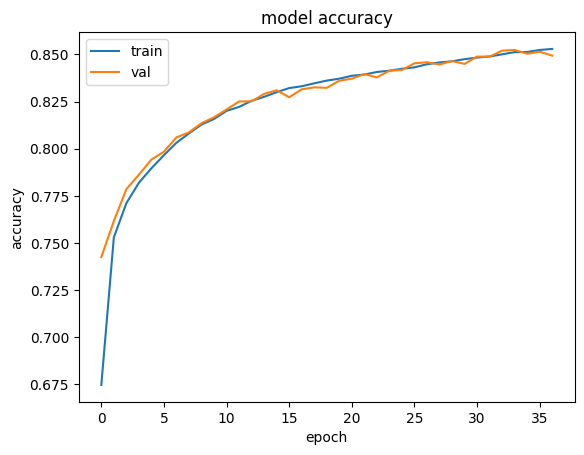

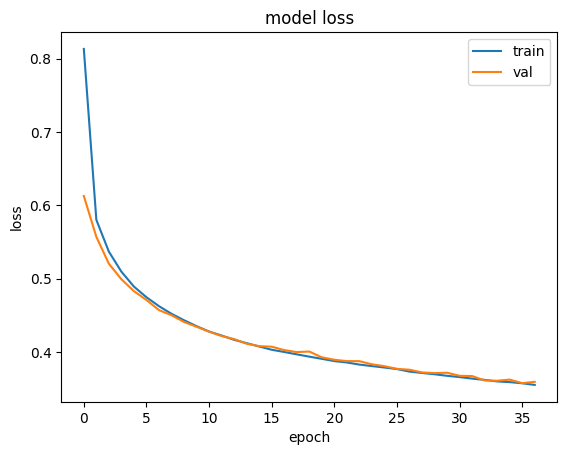

Test loss: 0.3651818037033081
Test accuracy: 0.847422182559967
3632/3632 [==============================] - 5s 1ms/step


In [63]:
num_epochs = 100
batch_size = 1024

earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3)
history = classifier.fit(X_train,
                         y_train,
                         epochs=num_epochs,
                         batch_size=batch_size,
                         callbacks=[earlystop_callback],
                         validation_split=0.1,
                         verbose=1)

plot_history(history, 'acc')
plot_history(history, 'loss')

score = classifier.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)

# Get the class with highest probability for each sample
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


3632/3632 [==============================] - 6s 2ms/step
[[36508  5474    12     0    43    19   312]
 [ 6398 49247   321     1   315   334    45]
 [   14   448  6153    65     7   464     0]
 [    0     0   126   376     0    47     0]
 [  150   758    50     0   925    14     2]
 [   15   458  1030    44     5  1921     0]
 [  715    44     0     0     0     0  3343]]


In [76]:
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Create a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled. If not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  # Check for lists of classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


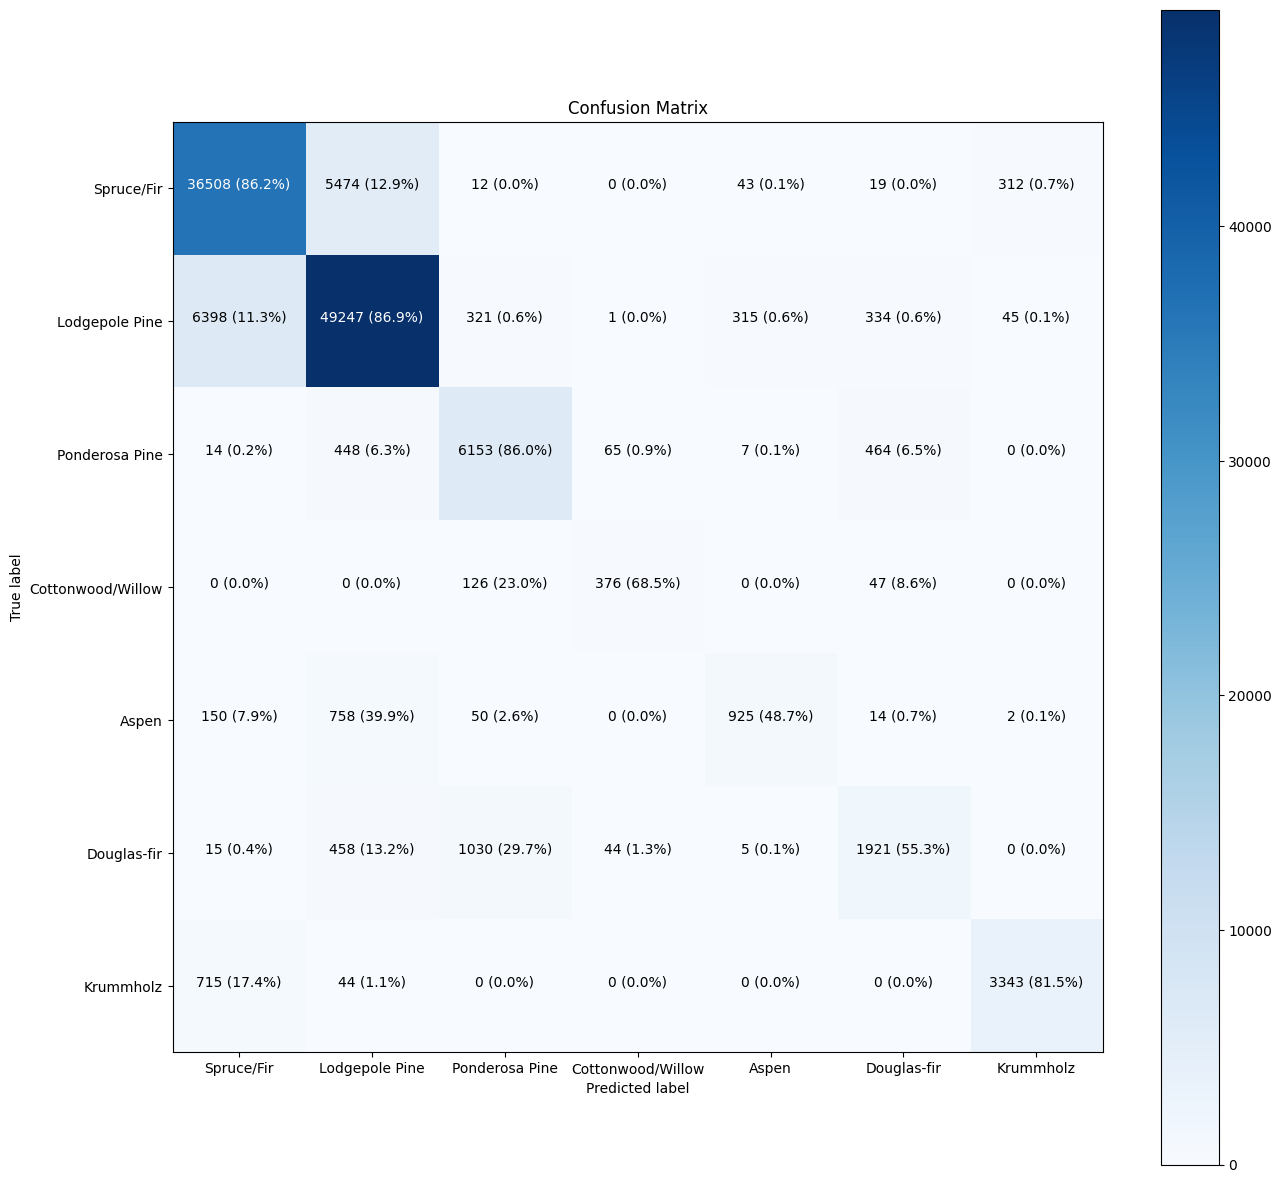

In [74]:
class_names = ['Spruce/Fir', 'Lodgepole Pine',
               'Ponderosa Pine', 'Cottonwood/Willow',
               'Aspen', 'Douglas-fir', 'Krummholz']

# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Summary:

The classifier model achieves suffiecent test accuracy and acceptable test loss. The numbers along the diagonal of the heatmap show how many covers were correctly classified. Numbers on either sides of the diagonal show mis-classifications. It is visible that Lodgepole Pine, Cottonwood Willow, Aspen, and Douglas-Fir suffer from a high percentage of mis-classifications.
